**Full Name:** [ALISHA DHAKAL]

**Project:** [Final Project]



# **Project Goal**

**Goal:**  
Use machine learning to predict which customers are likely to churn (leave the company),
and generate business insights to reduce churn.

# **Load the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

# **Import Libraries**


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)


### **Load the dataset into dataframe**

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Checking dataset info**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Exploring Target Variable "Churn"**





In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# **Visualization**

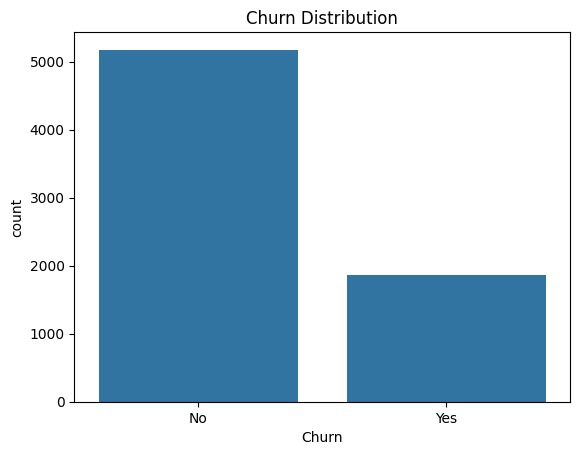

In [ ]:
# Visualizing churn distribution using a bar chart
# Helpful to see if the data is imbalanced
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


## **Histogram**

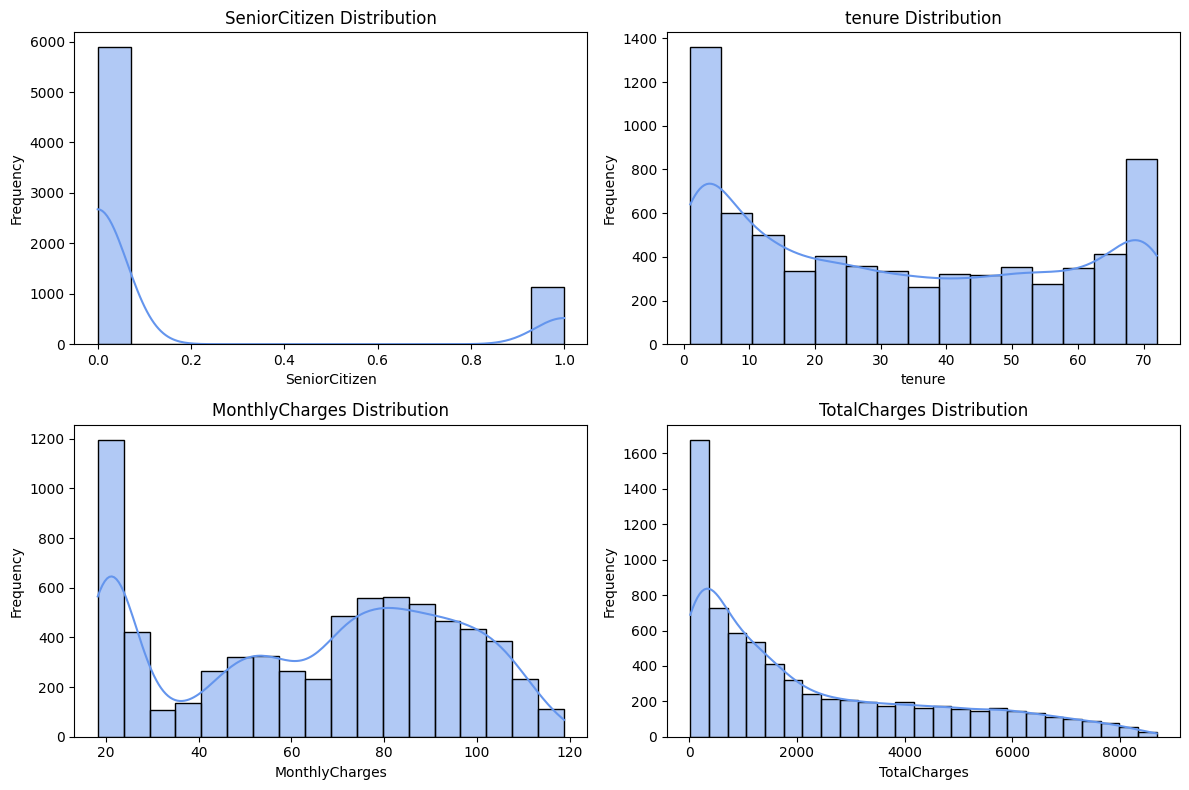

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='cornflowerblue')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

The histograms for tenure, monthly charges, and total charges show clear patterns in customer behavior.
Most customers have very low tenure, suggesting a high churn risk in the early months.
Monthly charges are widely distributed, with higher charges associated with increased churn.
Total charges show a right-skewed distribution, indicating many new customers with low accumulated expenses.


### **Correlation Heatmap**

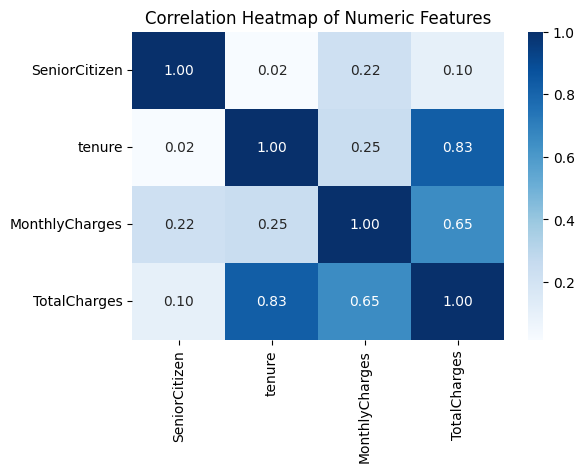

In [ ]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The correlation heatmap shows that Tenure and TotalCharges have a strong positive correlation, which makes sense because the longer a customer stays, the more they pay over time. MonthlyCharges is weakly correlated with both features, indicating customers with high monthly fees do not necessarily have higher total charges due to early churn. The relationships help explain why tenure is a strong churn predictor.

# **BOX PLOT**

### **Boxplot: Monthly Charges vs Churn**

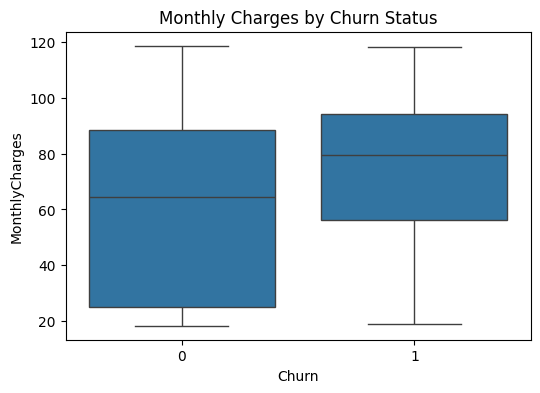

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn Status")
plt.show()

Churned customers tend to have higher monthly charges than non-churned customers, indicating that higher pricing may be driving dissatisfaction.

### **Boxplot: Tenure vs Churn**

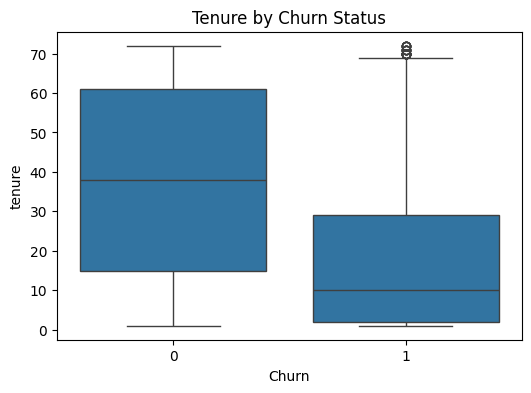

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure by Churn Status")
plt.show()

Customers who churn tend to have very low tenure, confirming that the first few months of service are the highest risk. Engaging early with new customers may reduce churn.

# **Clean Dataset**


### **Drop the customerID column**

In [ ]:
# 'customerID' is just an identifier and does not help predict churn.
# I remove it to avoid unnecessary noise in the model.
df = df.drop(columns=['customerID'])

NameError: name 'df' is not defined

### **Convert TotalCharges from string to numeric**

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### **Check missing values created after conversion**

In [ ]:
df['TotalCharges'].isna().sum()

np.int64(11)

### **Remove rows with missing TotalCharges**

In [ ]:
# Removing rows with missing TotalCharges because they cannot be used for modeling.
df = df.dropna(subset=['TotalCharges'])

# Resetting index after removing rows to keep the dataset clean.
df = df.reset_index(drop=True)

# **Convert Churn Yes/No into 1/0**

In [ ]:
# Converting the target variable 'Churn' into numeric values:
# Yes - 1 (customer churned)
# No  - 0 (customer stayed)
# Machine learning models require numeric labels.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# **Split Features ,Target & Identify Column Types**

In [ ]:
# Separating the target variable 'Churn' from the input features.
# X = all columns except Churn
# y = the Churn column (what we want to predict)
X = df.drop(columns=['Churn'])
y = df['Churn']
# Selecting categorical columns (object/string types)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Selecting numeric columns (int and float types)
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# **Train/Test Split**

In [ ]:
# Splitting data into training and testing sets
# test_size=0.2 means 20% test data and 80% training data
# stratify=y ensures both sets have similar churn percentages
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (5625, 19)
Test set shape: (1407, 19)


# **Create a Preprocessing Pipeline**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Encoding categorical variables using OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Scaling numeric features to standard normal distribution
numeric_transformer = StandardScaler()

# ColumnTransformer applies the right preprocessing to each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

# **Logistic Regression**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Creating a pipeline that preprocesses data and then fits logistic regression
log_reg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,           # ensures model converges
        class_weight='balanced'  # helps handle data imbalance
    ))
])

# Training (fitting) the model
log_reg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

# **Evaluate logistic Regression**

### **Predictions**

In [ ]:
# Predicting churn for test data
y_pred_lr = log_reg_model.predict(X_test)

# Predicting churn probabilities (used for ROC-AUC)
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]


### **Classification report**

In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



### **Confusion Matrix**

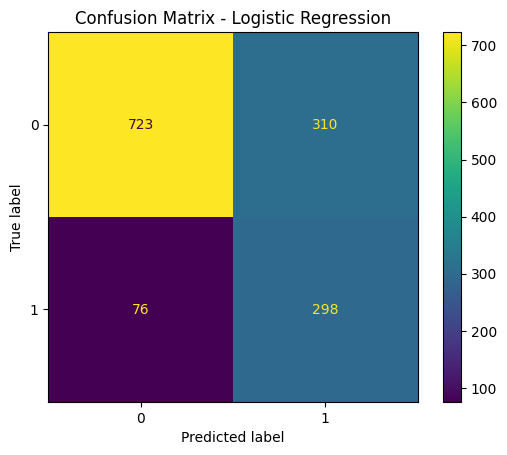

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### **ROC CURVE**

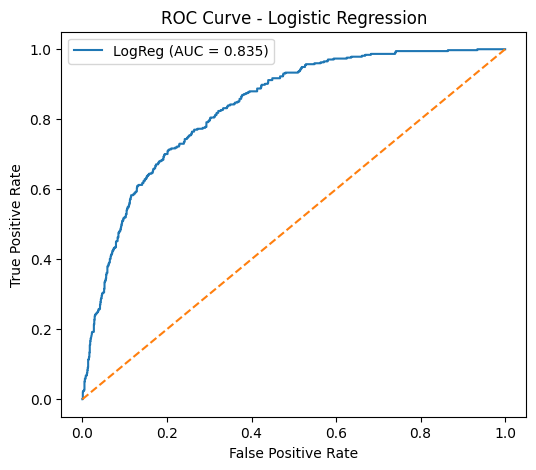

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {roc_auc_lr:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


# **Train Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating a pipeline for Random Forest.
# It includes the same preprocessing steps as Logistic Regression:
# - OneHotEncoding for categorical features
# - Scaling for numeric features (not required for RF but okay)
# Then applies RandomForestClassifier.
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,      # number of trees in the forest
        random_state=42,
        class_weight='balanced'  # handle churn imbalance
    ))
])

# Training the model on the training data
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

## **Predictions with Random Forest**

In [ ]:
# Predicting churn labels for test dataset
y_pred_rf = rf_model.predict(X_test)

# Predicting churn probability scores (used for ROC curve)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


# **Performance Metrics for Random Forest**

### **Classification Report**

In [ ]:
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



### **Confusion Matrix**

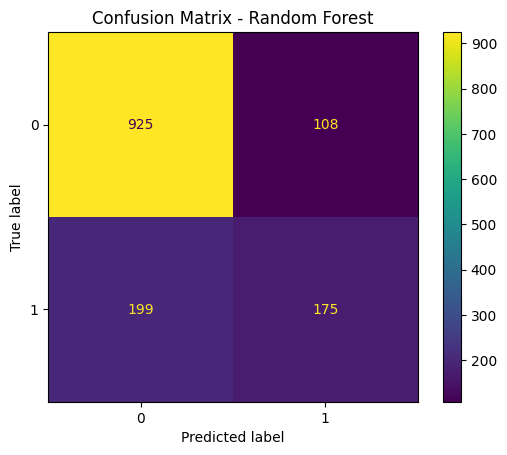

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


### **ROC CURVE**

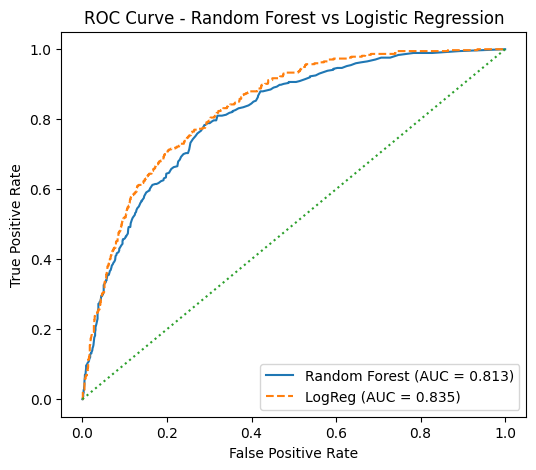

In [ ]:
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {roc_auc_lr:.3f})", linestyle='--')
plt.plot([0,1], [0,1], linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest vs Logistic Regression")
plt.legend()
plt.show()

# **Feature Importance (Top Predictors)**

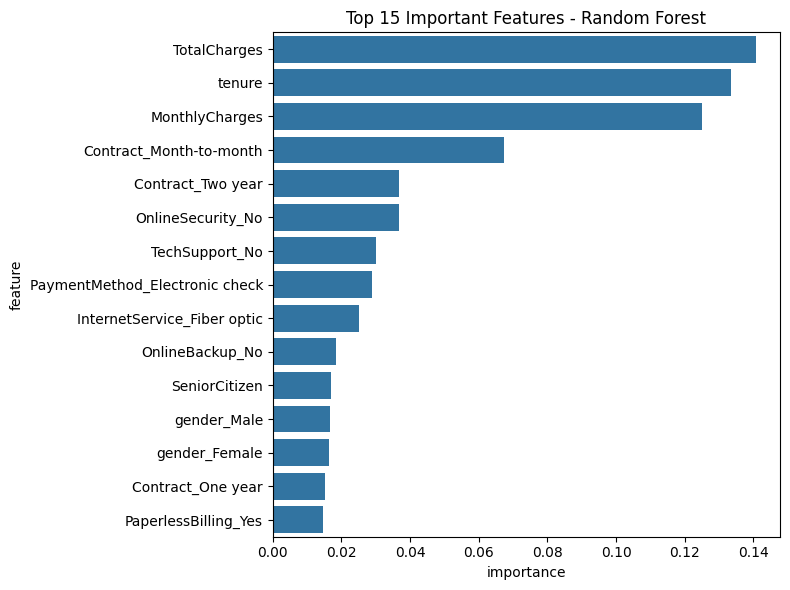

In [ ]:
# Extract the OneHotEncoder used inside the preprocessing pipeline
ohe = rf_model.named_steps['preprocess'].named_transformers_['cat']

# Get encoded categorical feature names
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Combine categorical and numeric feature names into one list
all_feature_names = np.concatenate([ohe_feature_names, np.array(numeric_cols)])

# Get feature importances from the trained Random Forest model
rf_clf = rf_model.named_steps['classifier']
importances = rf_clf.feature_importances_

# Create DataFrame for easier viewing
feat_importances = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Show top 15 most important features
feat_importances.head(15)
plt.figure(figsize=(8,6))
sns.barplot(
    data=feat_importances.head(15),
    x='importance',
    y='feature'
)
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.show()

### **High Risk Customer List**

In [ ]:
df_risk = df.copy()
df_risk['Churn_Probability'] = rf_model.predict_proba(X)[:, 1]

df_risk.sort_values(by='Churn_Probability', ascending=False).head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Probability
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1.0
6486,Male,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65,1,1.0
683,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,No,Mailed check,71.10,71.10,0,1.0
1726,Female,1,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,1,1.0
4455,Male,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.85,69.85,1,1.0
973,Male,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,1,1.0
2264,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,No,Mailed check,70.90,70.90,1,1.0
3743,Male,1,No,No,2,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,196.75,1,1.0
3765,Male,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,79.05,79.05,1,1.0
2189,Male,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,79.50,79.50,1,1.0
